# Problem 1: Splitting the data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Below is our solution to part 1. I used the HDI and life expectancy values from 2021 since they were the latest available and as such I figured that they were more accurate than older, measured values.

The training-test split is, again, .75/.25 which is the ratio recommended in the lectures.

In [ ]:
path = input()
df = pd.read_csv(path)
cols = list(df.columns)

training_data, testing_data = train_test_split(df, test_size=0.25, random_state=64)

hdi_2021 = df.loc[df["Year"] == 2021, "Human Development Index (value)"]
le_2021 = df.loc[df["Year"] == 2021, "Life Expectancy at Birth, both sexes (years)"]
hdi_train_2021 = training_data.loc[training_data["Year"] == 2021, "Human Development Index (value)"]
hdi_testing_2021 = testing_data.loc[testing_data["Year"] == 2021, "Human Development Index (value)"]
le_train_2021 = training_data.loc[training_data["Year"] == 2021, "Life Expectancy at Birth, both sexes (years)"]
le_testing_2021 = testing_data.loc[testing_data["Year"] == 2021, "Life Expectancy at Birth, both sexes (years)"]

/content/life_expectancy.csv


# Problem 2: Single-variable model

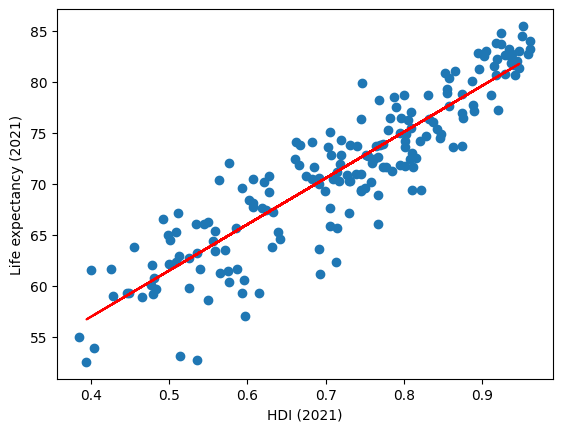

Correlation between predicted and actual values: 0.920535687722114
Mean Squared Error: 10.656815077098218
Intercept: 38.86694119788372


In [ ]:
peb = pd.DataFrame(df.corr(method='pearson', numeric_only=True))
life_expectancy = peb.loc["Life Expectancy at Birth, both sexes (years)"].drop(["Life Expectancy at Birth, both sexes (years)"])
max_corr = np.max(life_expectancy) # Human Development Index (value) has the strongest releationship

# b)
# x = hdi, y = life expectancy

a = np.reshape(hdi_train_2021, (-1, 1)) # x_train
b = np.reshape(le_train_2021, (-1,))
c = np.reshape(hdi_testing_2021, (-1, 1))

x_train = a
y_train = b
x_test = c
model = LinearRegression()
model.fit(x_train, y_train)
yfit = model.predict(x_test) # give x-values (that we have not trained on) to model and return predicted y-values

plt.scatter(hdi_2021, le_2021)
plt.plot(c, yfit, c='r')
plt.xlabel("HDI (2021)")
plt.ylabel("Life expectancy (2021)")
#plt.legend()
plt.show()
####################################################################################################################

# c)
intercept = model.intercept_
correlation = np.corrcoef(yfit.flatten(), le_testing_2021.to_numpy().flatten())[0, 1]
mse = mean_squared_error(le_testing_2021, yfit)

print(f"Correlation between predicted and actual values: {correlation}")
print(f"Mean Squared Error: {mse}")
print(f"Intercept: {intercept}")


From the correlation we see that the Human Development Indec (HDI) has the highest correlation with the target variable. HDI is a value that is calculated through other metrics; life expectancy, education, and per capita income. It seems quite obvious how all of these metrics are linked to a higher quality of life and, thus, a higher life expectancy [1].



# Problem 3: Non-linear relationship

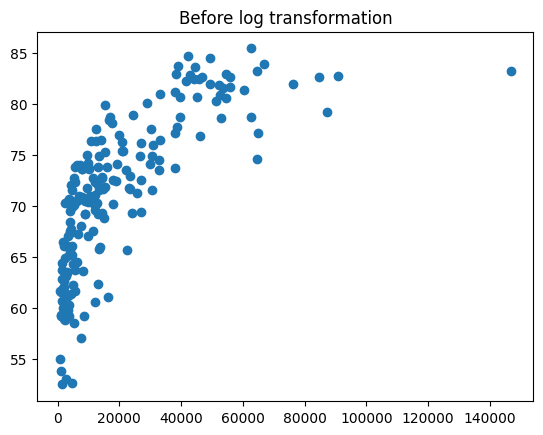

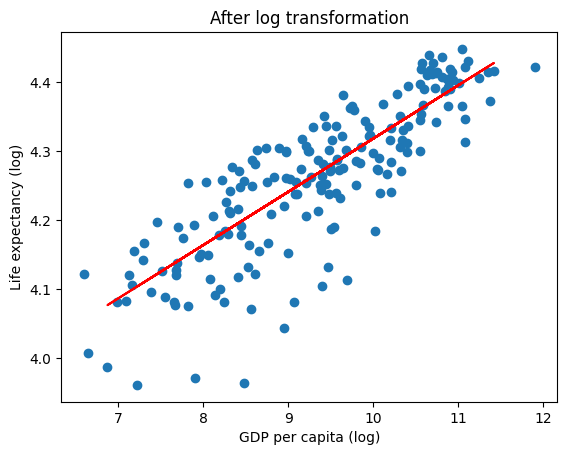

Correlation between predicted and actual values before log transform: 0.7372240572866272
Correlation between predicted and actual values after log transform: 0.8365557689671287


In [ ]:
gdp_2021 = df.loc[df["Year"] == 2021, "Gross National Income Per Capita (2017 PPP$)"]
le_2021 = df.loc[df["Year"] == 2021, "Life Expectancy at Birth, both sexes (years)"]
gdp_train_2021 = training_data.loc[training_data["Year"] == 2021, "Gross National Income Per Capita (2017 PPP$)"]
gdp_testing_2021 = testing_data.loc[testing_data["Year"] == 2021, "Gross National Income Per Capita (2017 PPP$)"]
le_train_2021 = training_data.loc[training_data["Year"] == 2021, "Life Expectancy at Birth, both sexes (years)"]
le_testing_2021 = testing_data.loc[testing_data["Year"] == 2021, "Life Expectancy at Birth, both sexes (years)"]


x_train = np.reshape(gdp_train_2021, (-1, 1)) # x_train
y_train = np.reshape(le_train_2021, (-1,))
x_test = np.reshape(gdp_testing_2021, (-1, 1))

plt.title("Before log transformation")
plt.scatter((gdp_2021), (le_2021))
plt.show()

plt.title("After log transformation")
plt.scatter(np.log(gdp_2021.to_numpy()), np.log(le_2021.to_numpy()))
plt.xlabel("GDP per capita (log)")
plt.ylabel("Life expectancy (log)")

log_x = np.log(x_train)
log_y = np.log(y_train)
model.fit(log_x, log_y)
yfit = model.predict(np.log(x_test))
plt.plot(np.log(x_test), yfit, c='r')
plt.show()

correlation = np.corrcoef(gdp_2021, le_2021)[0, 1]
log_correlation = np.corrcoef(np.log(gdp_2021), np.log(le_2021))[0, 1]
print(f"Correlation between predicted and actual values before log transform: {correlation}")
print(f"Correlation between predicted and actual values after log transform: {log_correlation}")

# Problem 4
Start perfroming a search for find sutible variable subset that togehter will performe better then problem 2 that only used variable HDI. To be able to compare them the data used also needs to be from 2021.

In [ ]:
df_2021 = df[df["Year"] == 2021]

# Calculate correlation matrix
correlation_matrix = df_2021.corr(method="pearson", numeric_only=True)
print(correlation_matrix["Life Expectancy at Birth, both sexes (years)"].sort_values(ascending=False))

selected_variables = ["Median Age, as of 1 July (years)", "Expected Years of Schooling, female (years)", "Gross National Income Per Capita (2017 PPP$)", "Population Annual Doubling Time (years)", "Material footprint per capita (tonnes)"]

Life Expectancy at Birth, both sexes (years)                                       1.000000
Human Development Index (value)                                                    0.906214
Median Age, as of 1 July (years)                                                   0.838063
Expected Years of Schooling, female (years)                                        0.797977
Expected Years of Schooling (years)                                                0.780125
Mean Years of Schooling, female (years)                                            0.751349
Expected Years of Schooling, male (years)                                          0.744452
Gross National Income Per Capita (2017 PPP$)                                       0.737224
Mean Years of Schooling (years)                                                    0.734290
Mean Years of Schooling, male (years)                                              0.722366
Population with at least some secondary education, female (% ages 25 and older) 

By looking at the list HDI is a winner but the problem specifed that we use other variables to try to create a better model.

The variables used are:
    "Median Age, as of 1 July (years)", "Expected Years of Schooling, female (years)", "Gross National Income Per Capita (2017 PPP$)", "Population Annual Doubling Time (years)", "Material footprint per capita (tonnes)"

The reasoning behind this is all of them had high/moderate correlation to life expectancy at birth. Another reason behind the picks is that none of the variables are related to each other. If Mutiple picks that are related to school or age, which avoids multicollinearity. We spread out the variabels to create a better picture of the whole situation.

In [ ]:
#Clean the data so we get rid of the NaN that might be included which blcoks the model creation
cleaned_data = df_2021[selected_variables + ["Life Expectancy at Birth, both sexes (years)"]].dropna()

#Dataspliting
X = cleaned_data[selected_variables]
y = cleaned_data["Life Expectancy at Birth, both sexes (years)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=64)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r_squared = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
correlation = np.corrcoef(y_pred, y_test)[0, 1]
intercept = model.intercept_

print(f"Pearson correlation between predicted and actual values: {correlation}")
print(f"The coefficient of determination (R-squared): {r_squared}")
print(f"Mean Squared Error: {mse}")
print(f"Intercept: {intercept}")

Pearson correlation between predicted and actual values: 0.9404019862242834
The coefficient of determination (R-squared): 0.8840858995184556
Mean Squared Error: 7.062512148578065
Intercept: 43.19583865173623


The Multiple linear regression model does outperform the singel varaibale by 0.9404019862242834 - 0.920535687722114 = 0.019866298502169366. This is better but only by rougly 2%.

# Refrences
[1] Wikipedia, "Human Development Index" Wikipedia, [Online] Available: https://en.m.wikipedia.org/wiki/Human_Development_Index [Accessed: Oct. 03 2024]